# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

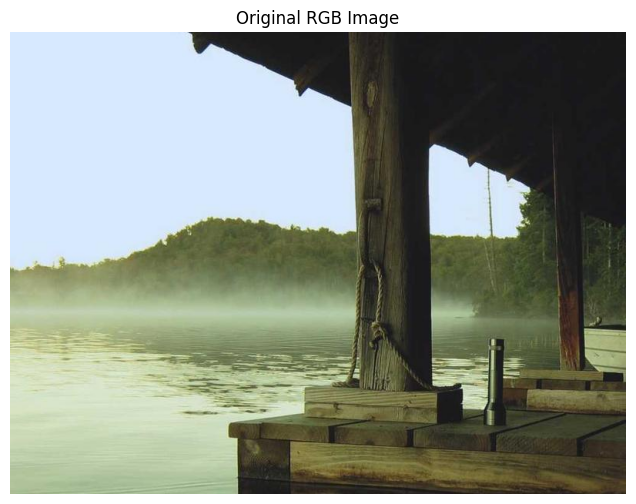

Image loaded successfully from https://picsum.photos/id/230/800/600 and displayed.
Shape of the RGB image: (600, 800, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64

import requests

# Using a specific image ID for reproducibility
image_url = "https://picsum.photos/id/230/800/600"
response = requests.get(image_url)

# Ensure the request was successful
response.raise_for_status()

# Load the image using PIL
img = Image.open(io.BytesIO(response.content))

# Convert the PIL Image to a NumPy array
img_rgb = np.array(img)

# Display the RGB image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

print(f"Image loaded successfully from {image_url} and displayed.")
print(f"Shape of the RGB image: {img_rgb.shape}")

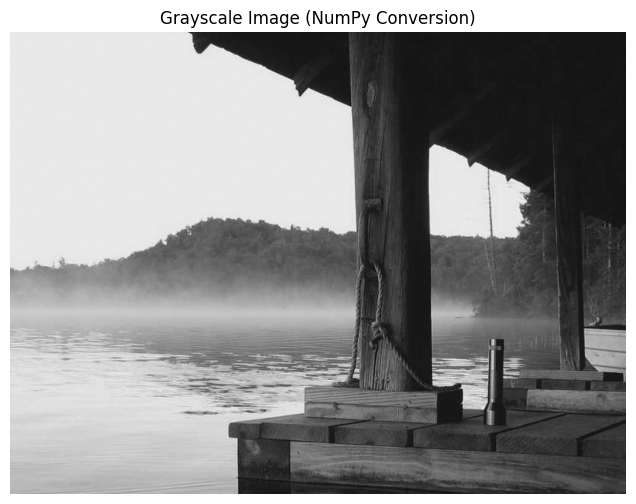

Grayscale image converted using NumPy and displayed.
Shape of the NumPy grayscale image: (600, 800)


In [ ]:
import cv2
 # Import cv2 for later comparison, though not used in this step

# Convert to grayscale using NumPy (weighted sum formula)
# Formula: Grayscale = 0.299 * R + 0.5870 * G + 0.1140 * B
# Ensure img_rgb is float type for accurate calculations
img_rgb_float = img_rgb.astype(np.float32) / 255.0 # Normalize to [0, 1] if needed for precise weighting, then convert back to [0, 255] for display

# Split channels
R = img_rgb_float[:, :, 0]
G = img_rgb_float[:, :, 1]
B = img_rgb_float[:, :, 2]

# Apply weighted sum
img_gray_numpy = (0.298 * R + 0.580 * G + 0.114 * B) * 255.0
img_gray_numpy = img_gray_numpy.astype(np.uint8)

# Display the grayscale image converted with NumPy
plt.figure(figsize=(8, 6))
plt.imshow(img_gray_numpy, cmap='gray')
plt.title("Grayscale Image (NumPy Conversion)")
plt.axis("off")
plt.show()

print(f"Grayscale image converted using NumPy and displayed.")
print(f"Shape of the NumPy grayscale image: {img_gray_numpy.shape}")

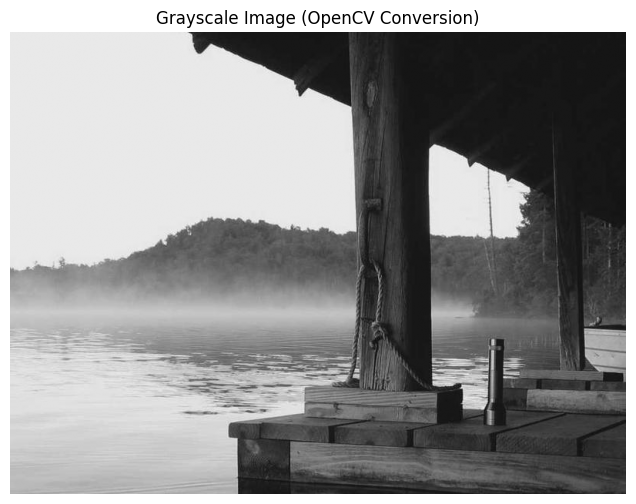

Grayscale image converted using OpenCV and displayed.
Shape of the OpenCV grayscale image: (600, 800)


In [ ]:


# Convert to grayscale using OpenCV
# cv2.COLOR_RGB2GRAY converts an RGB image to grayscale
img_gray_opencv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image converted with OpenCV
plt.figure(figsize=(8, 6))
plt.imshow(img_gray_opencv, cmap='gray')
plt.title("Grayscale Image (OpenCV Conversion)")
plt.axis("off")
plt.show()

print(f"Grayscale image converted using OpenCV and displayed.")
print(f"Shape of the OpenCV grayscale image: {img_gray_opencv.shape}")

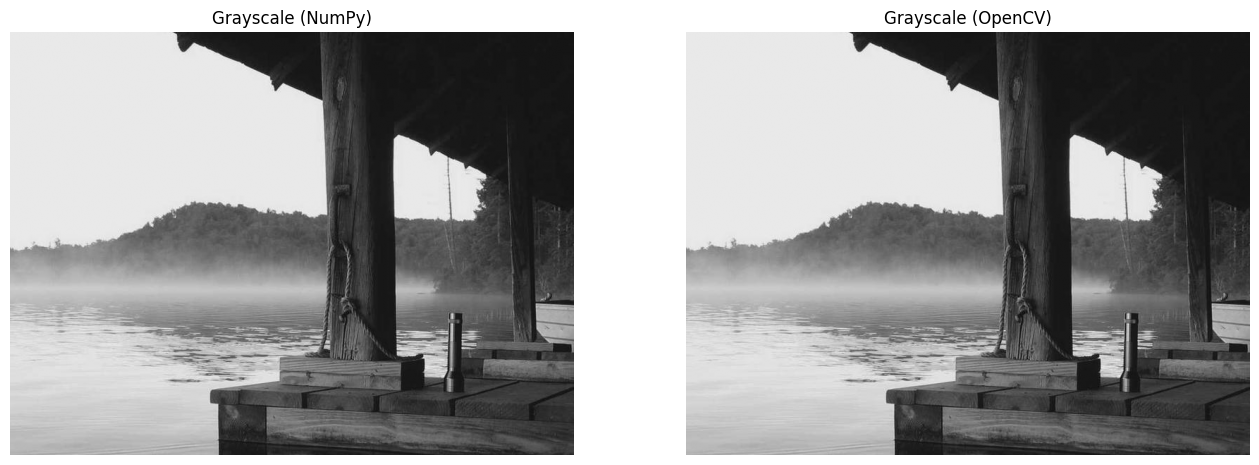

Mean Absolute Difference between NumPy and OpenCV grayscale: 1.5072


In [ ]:


# Display both grayscale images for visual comparison
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gray_numpy, cmap='gray')
plt.title('Grayscale (NumPy)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray_opencv, cmap='gray')
plt.title('Grayscale (OpenCV)')
plt.axis('off')

plt.show()

# Calculate the mean absolute difference between the two grayscale images
diff = np.abs(img_gray_numpy.astype(np.float32) - img_gray_opencv.astype(np.float32))
mean_abs_diff = np.mean(diff)

print(f"Mean Absolute Difference between NumPy and OpenCV grayscale: {mean_abs_diff:.4f}")

In [ ]:
print("\n--- Array Shapes ---")
print(f"Original RGB image shape: {img_rgb.shape}")
print(f"NumPy grayscale image shape: {img_gray_numpy.shape}")
print(f"OpenCV grayscale image shape: {img_gray_opencv.shape}")

print("\n--- Sample Pixel Values (Top-Left 2x2) ---")
print("Original RGB image (first 2x2 pixels):\n", img_rgb[:2, :2])
print("\nNumPy grayscale image (first 2x2 pixels):\n", img_gray_numpy[:2, :2])
print("\nOpenCV grayscale image (first 2x2 pixels):\n", img_gray_opencv[:2, :2])


--- Array Shapes ---
Original RGB image shape: (600, 800, 3)
NumPy grayscale image shape: (600, 800)
OpenCV grayscale image shape: (600, 800)

--- Sample Pixel Values (Top-Left 2x2) ---
Original RGB image (first 2x2 pixels):
 [[[215 233 255]
  [215 233 255]]

 [[215 233 255]
  [215 233 255]]]

NumPy grayscale image (first 2x2 pixels):
 [[228 228]
 [228 228]]

OpenCV grayscale image (first 2x2 pixels):
 [[230 230]
 [230 230]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# 1. Apply the 2D Fast Fourier Transform (FFT) to the img_gray_opencv image
f = np.fft.fft2(img_gray_numpy)

# 2. Shift the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

print("2D FFT computed and zero-frequency component shifted to the center.")
print(f"Shape of fshift: {fshift.shape}")

2D FFT computed and zero-frequency component shifted to the center.
Shape of fshift: (600, 800)


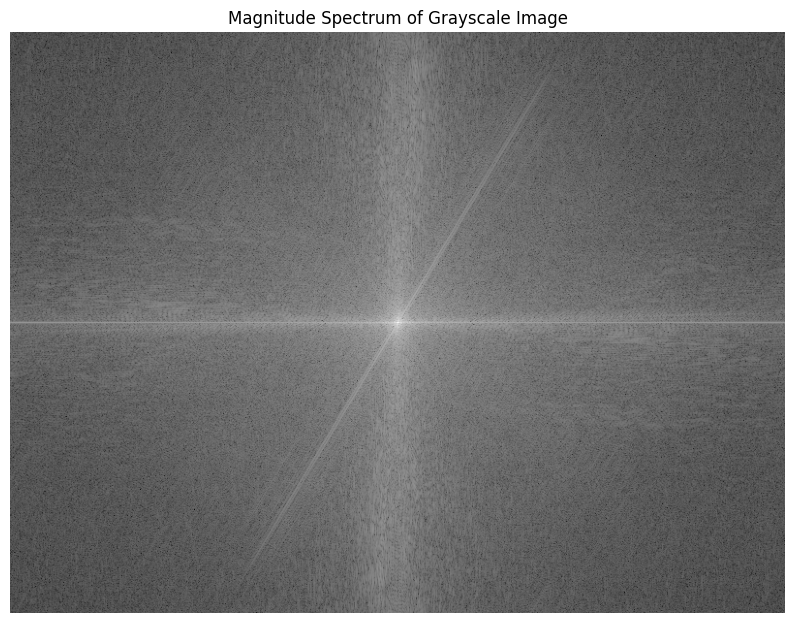

Magnitude and phase spectra computed.
Shape of magnitude_spectrum: (600, 800)
Shape of phase_spectrum: (600, 800)


In [ ]:
# 1. Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 2. Compute the phase spectrum
phase_spectrum = np.angle(fshift)

# 3. Display the magnitude spectrum
plt.figure(figsize=(10, 8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of Grayscale Image')
plt.axis('off')
plt.show()

print("Magnitude and phase spectra computed.")
print(f"Shape of magnitude_spectrum: {magnitude_spectrum.shape}")
print(f"Shape of phase_spectrum: {phase_spectrum.shape}")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:


def create_circular_filter_mask(shape, radius, filter_type):
    rows, cols = shape

    # Create coordinate arrays for the frequency domain, with origin at the center
    # fx and fy range from -cols/2 to cols/2 and -rows/2 to rows/2 respectively
    center_row, center_col = rows // 2, cols // 2
    y = np.arange(rows) - center_row
    x = np.arange(cols) - center_col
    X, Y = np.meshgrid(x, y)

    # Calculate the Euclidean distance of each point from the center
    distance = np.sqrt(X**2 + Y**2)

    # Initialize an empty mask
    mask = np.zeros(shape, dtype=np.float32)

    # Apply filter type logic
    if filter_type == 'lpf':
        # Low Pass Filter: values are 1 inside the radius, 0 outside
        mask[distance <= radius] = 1
    elif filter_type == 'hpf':
        # High Pass Filter: values are 1 outside the radius, 0 inside
        mask[distance > radius] = 1
    else:
        raise ValueError("filter_type must be 'lpf' or 'hpf'")

    return mask

print("Function `create_circular_filter_mask` defined successfully.")

Function `create_circular_filter_mask` defined successfully.


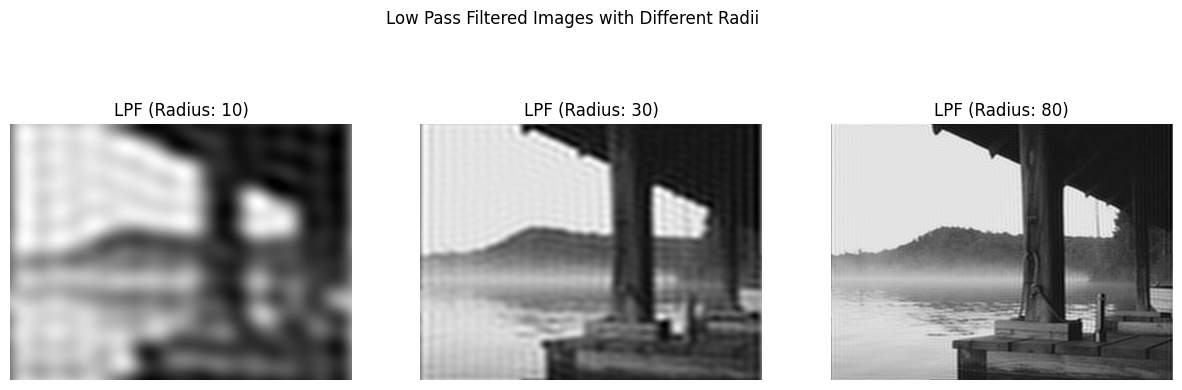

Part C1: Low Pass Filters with different radii applied and images reconstructed and displayed.


In [ ]:
import matplotlib.pyplot as plt

# Helper function to reconstruct the image from the frequency domain
def reconstruct_image(fshift_filtered):
    # Inverse shift the zero-frequency component back to the corners
    f_ishift = np.fft.ifftshift(fshift_filtered)
    # Apply the inverse 2D Fast Fourier Transform
    img_back = np.fft.ifft2(f_ishift)
    # Take the magnitude and convert to uint8 for display
    img_back = np.abs(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back


# Get the shape of the grayscale image for mask creation
rows, cols = img_gray_numpy.shape

# Define radii for the LPF masks
radii = [10, 30, 80]

plt.figure(figsize=(15, 5))

# Apply LPF masks for different radii
for i, radius in enumerate(radii):
    # 1. Create a mask (LPF)
    lpf_mask = create_circular_filter_mask((rows, cols), radius, 'lpf')

    # 2. Apply to fshift
    fshift_lpf = fshift * lpf_mask

    # 3. Reconstruct using ifftshift + ifft2
    img_lpf = reconstruct_image(fshift_lpf)

    # 4. Show blur levels increasing as radius decreases
    # Explanation: A smaller radius for an LPF means that more high-frequency components are blocked.
    # High frequencies correspond to fine details and sharp edges in the image.
    # By filtering these out, the image becomes smoother and appears more blurred.
    # Conversely, a larger radius allows more high frequencies through, resulting in a sharper image.
    plt.subplot(1, len(radii), i + 1)
    plt.imshow(img_lpf, cmap='gray')
    plt.title(f'LPF (Radius: {radius})')
    plt.axis('off')

plt.suptitle('Low Pass Filtered Images with Different Radii')
plt.show()

print("Part C1: Low Pass Filters with different radii applied and images reconstructed and displayed.")


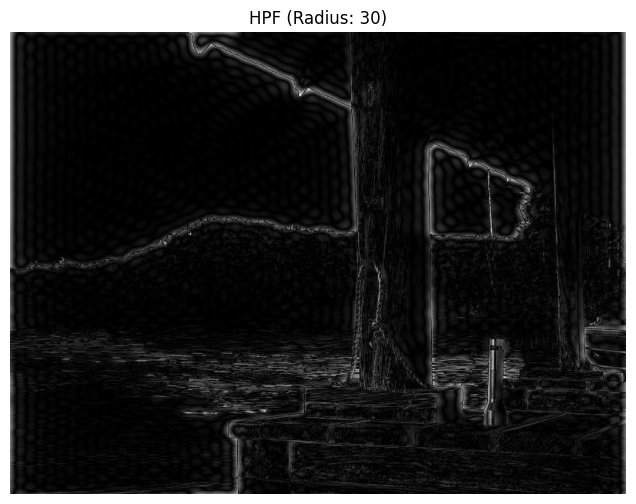

Part C2: High Pass Filter with radius 30 applied and image reconstructed and displayed.


In [ ]:
# Get the shape of the grayscale image for mask creation
rows, cols = img_gray_numpy.shape

# Define a radius for the HPF mask
hpf_radius = 30 # You can adjust this radius as needed

# 1. Create a HPF mask
hpf_mask = create_circular_filter_mask((rows, cols), hpf_radius, 'hpf')

# 2. Apply to fshift
fshift_hpf = fshift * hpf_mask

# 3. Reconstruct using ifftshift + ifft2
img_hpf = reconstruct_image(fshift_hpf)

# Display the HPF filtered image
plt.figure(figsize=(8, 6))
plt.imshow(img_hpf, cmap='gray')
plt.title(f'HPF (Radius: {hpf_radius})')
plt.axis('off')
plt.show()

print(f"Part C2: High Pass Filter with radius {hpf_radius} applied and image reconstructed and displayed.")


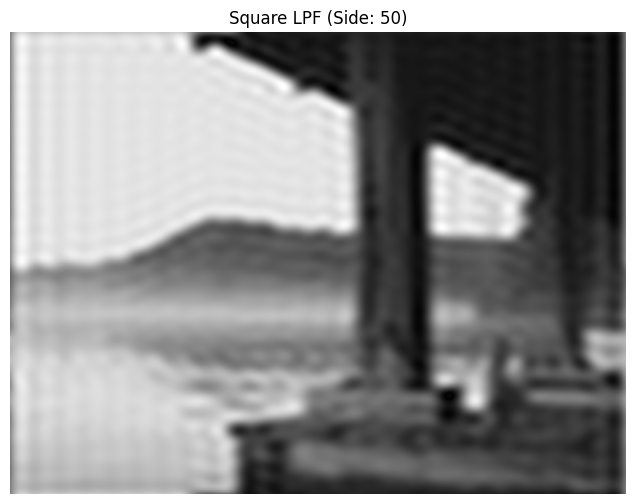

Part C3: Square Low Pass Filter with side 50 applied and image reconstructed and displayed.


In [ ]:
def create_square_filter_mask(shape, side, filter_type='lpf'):
    rows, cols = shape

    # Initialize an empty mask
    mask = np.zeros(shape, dtype=np.float32)

    # Calculate the coordinates for the center of the image
    center_row, center_col = rows // 2, cols // 2

    # Calculate the half-side for easier calculation
    half_side = side // 2

    # Define the boundaries of the square
    row_start = center_row - half_side
    row_end = center_row + half_side + (side % 2) # Adjust for odd side lengths
    col_start = center_col - half_side
    col_end = center_col + half_side + (side % 2) # Adjust for odd side lengths

    # Ensure boundaries are within image dimensions
    row_start = max(0, row_start)
    row_end = min(rows, row_end)
    col_start = max(0, col_start)
    col_end = min(cols, col_end)

    # Apply filter type logic (LPF for square mask)
    if filter_type == 'lpf':
        # Low Pass Filter: values are 1 inside the square, 0 outside
        mask[row_start:row_end, col_start:col_end] = 1
    else:
        raise ValueError("filter_type must be 'lpf' for square mask in this implementation.")

    return mask

# Get the shape of the grayscale image for mask creation
rows, cols = img_gray_numpy.shape

# Define the side of the square LPF mask
square_side = 50

# 1. Create a square LPF mask
square_lpf_mask = create_square_filter_mask((rows, cols), square_side, 'lpf')

# 2. Apply to fshift
fshift_square_lpf = fshift * square_lpf_mask

# 3. Reconstruct using ifftshift + ifft2
img_square_lpf = reconstruct_image(fshift_square_lpf)

# Display the square LPF filtered image
plt.figure(figsize=(8, 6))
plt.imshow(img_square_lpf, cmap='gray')
plt.title(f'Square LPF (Side: {square_side})')
plt.axis('off')
plt.show()

print(f"Part C3: Square Low Pass Filter with side {square_side} applied and image reconstructed and displayed.")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

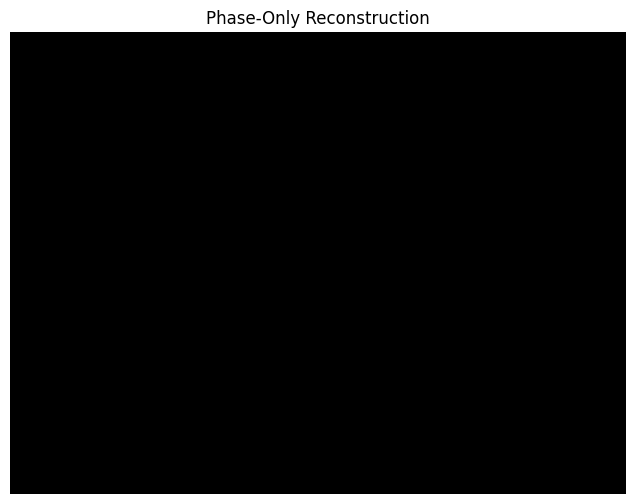

Part D1: Phase-only reconstruction applied and displayed.


In [ ]:
phase_only = fshift / np.abs(fshift)

# Reconstruct and display the phase-only image
img_phase_only = reconstruct_image(phase_only)

plt.figure(figsize=(8, 6))
plt.imshow(img_phase_only, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')
plt.show()
"""
np.angle(f_shift) to GET the phase angle,
but np.angle(f_shift) returns only the angle (in radians), which is a real number.
The code line (fshift / np.abs(fshift)) creates a complex array where:
Magnitude = 1 (since M/M = 1)
Phase = The original phase (M * e^(i*phi) / M = e^(i*phi))
This complex unit vector is necessary for the IFFT calculation.
"""

print("Part D1: Phase-only reconstruction applied and displayed.")

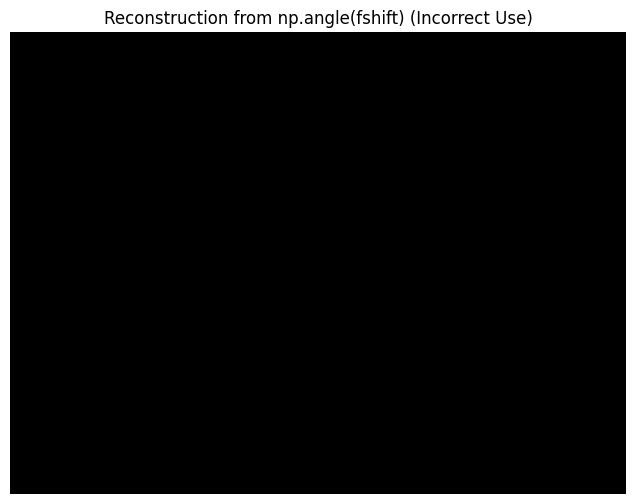

In [ ]:
img_from_angle_only = reconstruct_image(np.angle(fshift))

plt.figure(figsize=(8, 6))
plt.imshow(img_from_angle_only, cmap='gray')
plt.title('Reconstruction from np.angle(fshift) (Incorrect Use)')
plt.axis('off')
plt.show()
"""
Reconstructing from just np.angle(f_shift) results in noise or a highly distorted
and unrecognizable output.

Reason: The IFFT operation requires a complex number for each frequency component
in the form A * exp(i * phi).
When we pass the real-valued angle_array to IFFT, the IFFT treats the input as
(Real Part = angle_array, Imaginary Part = 0).
This fundamentally breaks the relationship between phase and frequency,
resulting in noise instead of the recognizable image shape that phase information usually provides.
"""

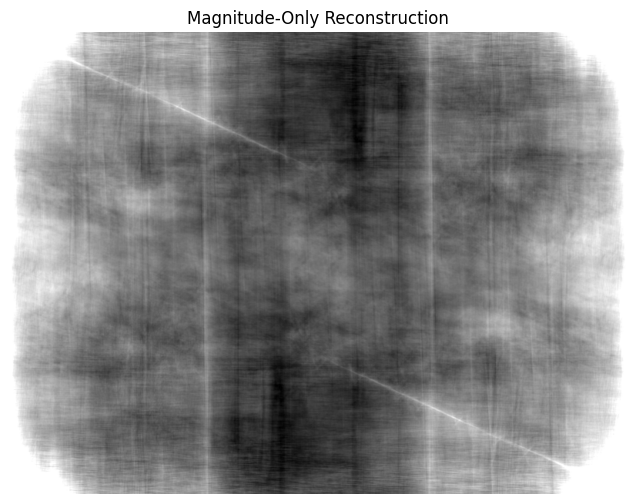

Part D2: Magnitude-only reconstruction applied and displayed.


In [ ]:
mag_only = np.abs(fshift)

# Reconstruct and display the magnitude-only image
img_magnitude_only = reconstruct_image(mag_only)

plt.figure(figsize=(8, 6))
plt.imshow(img_magnitude_only, cmap='gray')
plt.title('Magnitude-Only Reconstruction')
plt.axis('off')
plt.show()

print("Part D2: Magnitude-only reconstruction applied and displayed.")
"""
Guess for the role of logarithm in Magnitude Spectrum:
The Magnitude Spectrum (np.abs(fshift)) usually covers a huge dynamic range (many orders of
magnitude), making the fainter, higher-frequency components invisible when plotted directly.

The logarithm (np.log(1 + np.abs(fshift))) is used to compress this dynamic range,
making both the bright DC component (at the center) and the faint high-frequency details
visible on the same plot.

Why does Magnitude-Only Reconstruction look different than Magnitude Spectrum plot?
1. Magnitude Spectrum Plot uses LOGARITHM (log scale) to display the frequency content,
   while Magnitude-Only Reconstruction uses the UNCOMPRESSED magnitude array as input
   to the IFFT.
2. The Magnitude Spectrum plot shows the frequency domain data; the reconstruction plot
   shows the result of converting that data back to the spatial domain (IFFT).
3. The IFFT input (mag_only) is a real number. The resulting image is usually a highly
   symmetric blur due to the loss of phase, which contains spatial location information.
"""

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

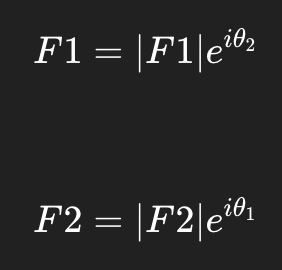

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Combined frequency representations created.
Combined images reconstructed.


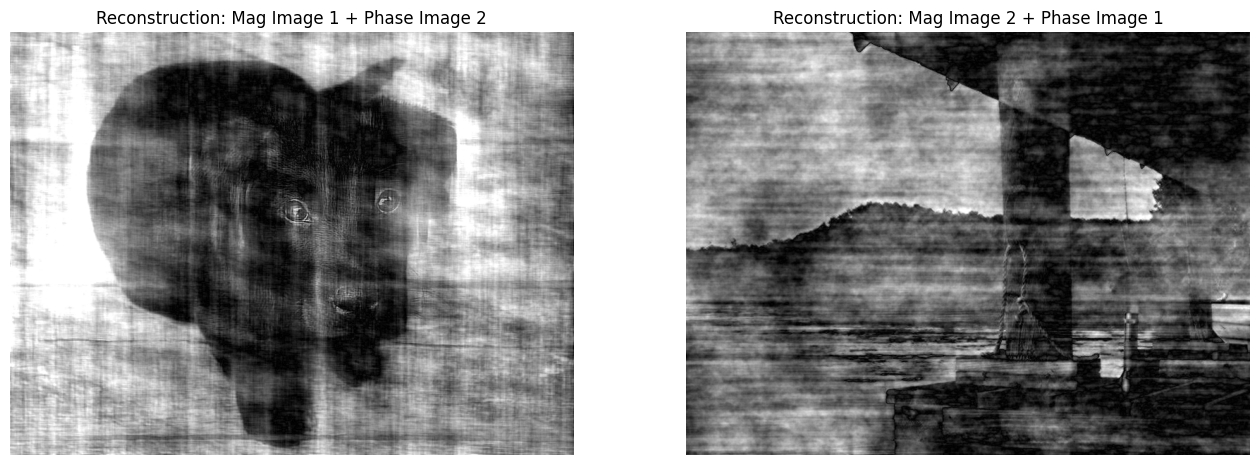

In [ ]:


# Helper function to reconstruct the image from the frequency domain
def reconstruct_image(fshift_filtered):
    # Inverse shift the zero-frequency component back to the corners
    f_ishift = np.fft.ifftshift(fshift_filtered)
    # Apply the inverse 2D Fast Fourier Transform
    img_back = np.fft.ifft2(f_ishift)
    # Take the magnitude and convert to uint8 for display
    img_back = np.abs(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back

# --- Combine Magnitude and Phase ---

# Combine magnitude of image 1 with phase of image 2
# The FFT result is a complex number: Magnitude * e^(i * Phase)
# So, combined_fshift_12 = magnitude_spectrum1 * (cos(phase_spectrum2) + i * sin(phase_spectrum2))
# Or, more directly: magnitude_spectrum1 * exp(1j * phase_spectrum2)
combined_fshift_M1P2 = magnitude_spectrum1 * np.exp(1j * phase_spectrum2)

# Combine magnitude of image 2 with phase of image 1
combined_fshift_M2P1 = magnitude_spectrum2 * np.exp(1j * phase_spectrum1)

print("Combined frequency representations created.")

# --- Reconstruct Images ---

# Reconstruct image from magnitude of image 1 and phase of image 2
img_M1P2 = reconstruct_image(combined_fshift_M1P2)

# Reconstruct image from magnitude of image 2 and phase of image 1
img_M2P1 = reconstruct_image(combined_fshift_M2P1)

print("Combined images reconstructed.")

# --- Display Results ---

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_M1P2, cmap='gray')
plt.title('Reconstruction: Mag Image 1 + Phase Image 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_M2P1, cmap='gray')
plt.title('Reconstruction: Mag Image 2 + Phase Image 1')
plt.axis('off')

plt.show()

# Explanation for Phase and Magnitude role
# Code Comment: Phase describes the structural information or the 'edges' and 'shapes' of the image.
# This is evident because when the phase of one image is combined with the magnitude of another,
# the reconstructed image often visually resembles the image from which the phase was taken.
# Magnitude, on the other hand, describes the 'texture' or intensity variations within the image.
# When the magnitude of one image is combined with the phase of another, the resulting image's
# 'brightness' and 'contrast' often reflect the image from which the magnitude was taken, but the structure is from the phase donor.